In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 빈도수 확인

In [2]:
df = pd.read_csv('./data/긍정부정2.csv')

df

,title,content,new_content,party_content,party_name,label
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""","[""JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...","[""JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...",[],[],[]
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
3,"한국당, 추미애 檢 고발..""선거법 위반""","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...",[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['부정']
...,...,...,...,...,...,...
80035,‘세월호 막말’ 닷새만에… 차명진 제명,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
80036,정봉주 “나를 개쓰레기 취급” 與 막말 비난,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '긍정', '부정', '긍정', '긍정', '부정']"
80037,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['긍정', '긍정', '부정']"
80038,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '부정']"


## 빈 리스트 제거

In [3]:
# 값이 비어있는 것을 제거
# 리스트의 길이가 2면 빈 리스트이다

df = df[df['party_content'].apply(lambda x : len(x) > 2)]

df

,title,content,new_content,party_content,party_name,label
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
3,"한국당, 추미애 檢 고발..""선거법 위반""","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...",[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['부정']
5,"靑, 이르면 6일 비서진 교체·조직 개편…윤건영 구로을 출마 유력",['윤 후임에 오종식·신상엽·이진석 등 거론고민정 불출마로 입장 정리한듯…사실상 중...,['윤 후임에 오종식·신상엽·이진석 등 거론고민정 불출마로 입장 정리한듯…사실상 중...,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...,"['더불어민주당', '더불어민주당']","['부정', '부정']"
...,...,...,...,...,...,...
80035,‘세월호 막말’ 닷새만에… 차명진 제명,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
80036,정봉주 “나를 개쓰레기 취급” 與 막말 비난,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '긍정', '부정', '긍정', '긍정', '부정']"
80037,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['긍정', '긍정', '부정']"
80038,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '부정']"


In [4]:
len_cnt = 0
for idx, row in df.iterrows():
    len_cnt += len(row['party_name'])
len_cnt

1662164

## 당에 대한 부정, 긍정 빈도수 확인

In [5]:
df2 = df.copy()
df2 = df2[['party_content', 'party_name', 'label']]
df2 = df2.reset_index(drop = True)

df2

,party_content,party_name,label
0,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
1,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
2,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
3,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['부정']
4,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...,"['더불어민주당', '더불어민주당']","['부정', '부정']"
...,...,...,...
68117,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
68118,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '긍정', '부정', '긍정', '긍정', '부정']"
68119,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['긍정', '긍정', '부정']"
68120,"[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '부정']"


In [6]:
# 당에 대한 부정 및 긍정 빈도수를 저장할 딕셔너리
res_dic = {}

# 각 행에서 당 이름과 해당 당에 대한 감정 레이블 추출 및 빈도수 계산 
for idx, row in df2.iterrows(): # DataFrame의 각 행에 대해 인덱스와 행 데이터를 반복적으로 얻을 수 있다
    parties_lst = eval(row['party_name'])
    label_lst = eval(row['label'])
    
    for party, label in zip(parties_lst, label_lst):
        if party not in res_dic: # 딕셔너리에 당이 없으면 당 이름을 추가
            res_dic[party] = {'긍정' : 0, '부정' : 0}
        res_dic[party][label] += 1 # 딕셔너리에 당이 있으면 부정, 긍정에 해당하는 라벨에 1을 추가
        
# 결과 출력
for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 더불어민주당
긍정 : 3127
부정 : 47006
당 : 자유한국당
긍정 : 1662
부정 : 16132
당 : 미래당
긍정 : 1254
부정 : 8089
당 : 정의당
긍정 : 3230
부정 : 11229
당 : 민중당
긍정 : 401
부정 : 1282
당 : 국민의당
긍정 : 2265
부정 : 8598
당 : 더불어시민당
긍정 : 937
부정 : 4177
당 : 무소속
긍정 : 1147
부정 : 4686
당 : 미래한국당
긍정 : 2130
부정 : 13286
당 : 우리공화당
긍정 : 505
부정 : 1392
당 : 민생당
긍정 : 1446
부정 : 9140
당 : 노동당
긍정 : 58
부정 : 195
당 : 한나라당
긍정 : 249
부정 : 263
당 : 녹색당
긍정 : 179
부정 : 562
당 : 새누리당
긍정 : 760
부정 : 1121
당 : 열린민주당
긍정 : 1277
부정 : 4491
당 : 한국경제당
긍정 : 99
부정 : 361
당 : 여성의당
긍정 : 23
부정 : 119
당 : 국가혁명배당금당
긍정 : 81
부정 : 794
당 : 자유당
긍정 : 49
부정 : 118
당 : 공화당
긍정 : 169
부정 : 377
당 : 기본소득당
긍정 : 19
부정 : 124
당 : 국민새정당
긍정 : 20
부정 : 55
당 : 친박신당
긍정 : 116
부정 : 314
당 : 기독자유통일당
긍정 : 25
부정 : 76
당 : 시대전환
긍정 : 41
부정 : 138
당 : 깨어있는시민연대당
긍정 : 4
부정 : 16
당 : 미래민주당
긍정 : 6
부정 : 24
당 : 통일민주당
긍정 : 3
부정 : 9
당 : 민중민주당
긍정 : 0
부정 : 1
당 : 가자환경당
긍정 : 40
부정 : 143
당 : 미래통합당
긍정 : 2929
부정 : 30764
당 : 남북통일당
긍정 : 2
부정 : 15
당 : 자유의새벽당
긍정 : 0
부정 : 5
당 : 가자!평화인권당
긍정 : 26
부정 : 56
당 : 가자코리아
긍정 : 1
부정 : 0
당 : 대한민국당
긍

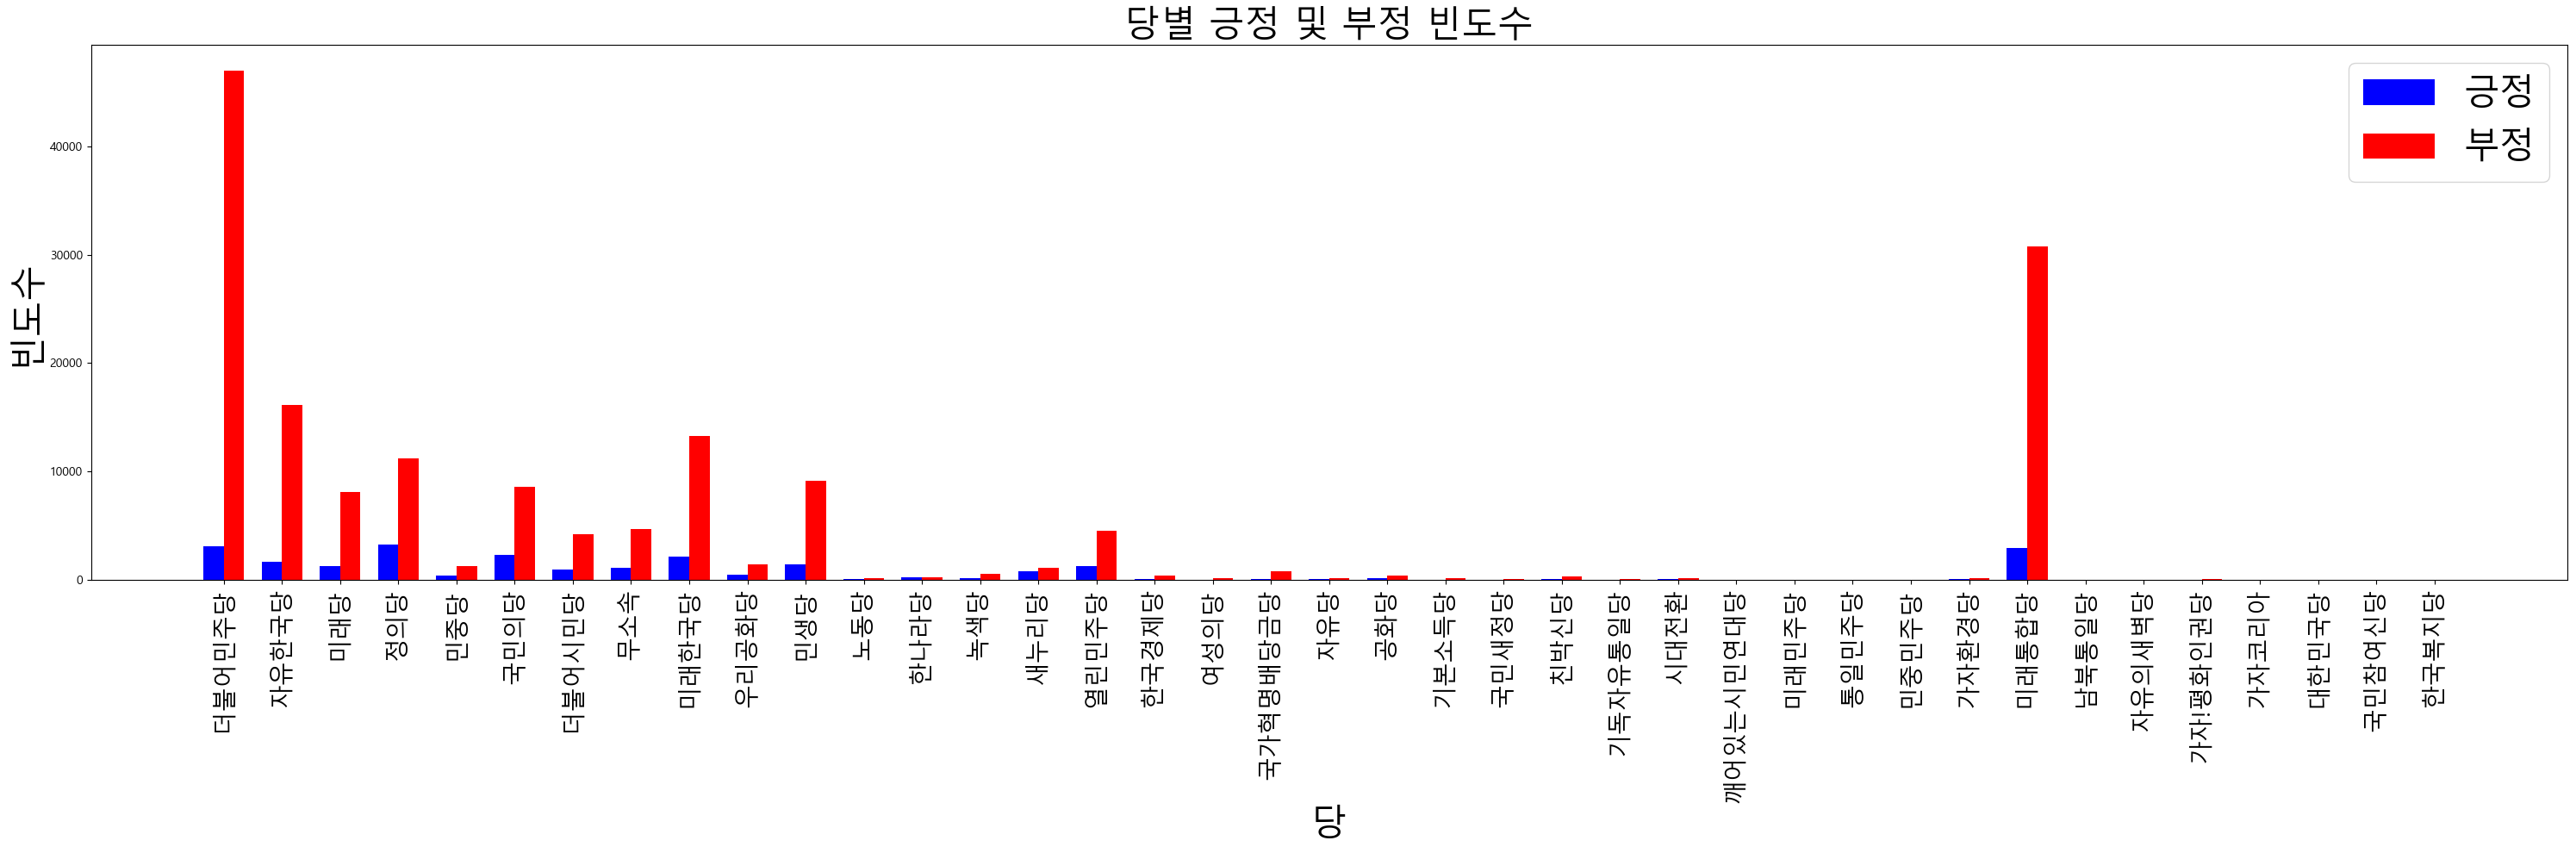

In [7]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [75]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(39, 2)


,긍정,부정
코리아,31067,80
더불어민주당,57107,445
미래통합당,44184,387
미래당,9109,187
정의당,15067,207
민중당,1588,29
국민의당,9183,237
더불어시민당,3893,46
무소속,9320,241
우리공화당,1808,33


# 당선 여부 확인

In [52]:
res_df = pd.read_csv('./data/당선결과.csv')
res_df

,name,party
0,이낙연,더불어민주당
1,고민정,더불어민주당
2,홍준표,무소속
3,배현진,미래통합당
4,심상정,정의당
...,...,...
295,이달곤,미래통합당
296,김철민,더불어민주당
297,김정호,더불어민주당
298,조정식,더불어민주당


In [53]:
res_gb = res_df.groupby(['party']).count().reset_index()

res_gb

,party,name
0,국민의당,3
1,더불어민주당,163
2,더불어시민당,17
3,무소속,5
4,미래통합당,84
5,미래한국당,19
6,열린민주당,3
7,정의당,6


In [54]:
num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.head()

,party,pos,neg
0,코리아,31067,80
1,더불어민주당,57107,445
2,미래통합당,44184,387
3,미래당,9109,187
4,정의당,15067,207


In [55]:
# 멀티 인덱스 삭제

num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [56]:
num_res_df = pd.merge(res_gb, num_df, on = 'party', how = 'right')
num_res_df.fillna(0, inplace = True)
num_res_df.columns = [['party', 'res', 'pos', 'neg']]
num_res_df.columns = num_res_df.columns.get_level_values(0)
num_res_df = num_res_df.sort_values('res', ascending = False)

num_res_df

,party,res,pos,neg
1,더불어민주당,163.0,57107,445
2,미래통합당,84.0,44184,387
12,미래한국당,19.0,12992,76
7,더불어시민당,17.0,3893,46
4,정의당,6.0,15067,207
8,무소속,5.0,9320,241
6,국민의당,3.0,9183,237
17,열린민주당,3.0,4866,28
0,코리아,0.0,31067,80
30,미래민주당,0.0,29,0


# 하는 중

감정분석

In [105]:
senti_analyzer_df = news.copy()
senti_analyzer_df = senti_analyzer_df[['party_content']]
senti_analyzer_df = senti_analyzer_df.reset_index(drop = True)
senti_analyzer_df

,party_content
0,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령..."
1,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...
2,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...
3,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...
4,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...
...,...
66557,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태..."
66558,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...
66559,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...
66560,"[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ..."


In [135]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

senti_analyzer = SentimentIntensityAnalyzer()
scores_lst = []

for idx, row in senti_analyzer_df[:5].iterrows():
    scores = []
    content_str = row['party_content']
    content_str = eval(content_str)
    for i in range(len(content_str)):
        senti_scores = senti_analyzer.polarity_scores(content_str[i])
        scores.append(senti_scores)
    scores_lst.append(scores)
    
print(scores_lst)

[[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yurim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [133]:
senti_analyzer_df[:5]

,party_content
0,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령..."
1,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...
2,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...
3,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...
4,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...
